## A. 분류기 평가

- 상황 (전처리후 -> 모델 선정 -> 학습 -> 평가 => 체크)
- 분류기(모델) : 나이브베이즈, 라소회귀, 로지스틱회귀, 결정트리, 서포트백터머신,
  앙상블분류기, 랜덤포레스트, 인공신경망등등..
  
1. 성능 평가 기준점  
- 원하는것(결과, 예측) 잘 해결하는지?  
- 원하지 않는것(빼야 할것, 걸러야할등) 잘 처리하는지?  
> 기준점을 낮추면 -> false positive(거짓 양성) 늘어나게 된다 -> 
  예를 들면 주식 추천 서비스라면=> 매수 주식 알리게 됨  
> 기존점을 높이면(보수적) -> false negative(거짓 음성)이 많아지게 된다 ->
  얘를 들어 의료진단 암확인시 오판을 할수 있다  

2. 분류기의 성능평가 기준 1
- 참 양성비 (true positive rate) : Y축
>  실제값이 참인 표본중 정답이라고 분류한 표본의 비율, 높을수록 좋다 => 최대 1.0
- 거짓 양성비 (false positive rate) : X축 
> 실제값이 거짓인 표본중 참으로  잘못 분류한 표본의 비율, 이상치 => 0.0


3. 분류기의 성능평가 기준 2
> 정밀도(precision)
> 재현율(recall)
> 정밀도와 재현율을 가지고 계산한 조화 평균값 F1-score

## B. 성능 평가 방법

- 혼동행렬
- ROC 곡선
- AUC 곡선/값
- F1 Score
- Lift 곡선

### B-1 혼동행렬

-> 데이터가 범주형(categorical) 변수를 예측하기위해 사용되는 지도학습법-분류
- 이진 분류(레이블이 2개) => 분류(classification) => 지도학습
  binary classification <-> 다중 클레스 분류(multi-class classification)
<-> 회귀(regression) : 연속값을 예측할대, 데이터가 수치형  


- 이진 분류기의 성능을 시각화하여 성능을 확인
- 2 x 2 행렬
- 예

|정답| 0을 예측한 표본수 | 1을 예측한 표본수 |
|:--:|:--:|:--:|
| 0 | 40  |  5 |
| 1 | 1  |  12 |

- 참(답이1인에1을넣은경우) 양성비(1을 넣은비율) :  12 / (1 + 12) = 0.92 => 가장 좋은값은 1.0
- 거짓(답이0인데1을넣는경우) 양성비(1을 넣은비율) : 5 / (40 + 5)  = 0.11 => 가장 좋은것은 0.0

### B-2 ROC 곡선

- 기준점에 따른 분류기의 성능을 시각화 하는것을 ROC 곡선
- 거짓 양성비가 x축, 참 양성비 y축 
- 코드로 평가 진행

In [2]:
# 한글 처리 시각화
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [3]:
import pandas as pd
import sklearn.datasets

In [9]:
# 아이리스 데이터를 사용하겟다 -> 이진 데이터화 해서 처리
ds = sklearn.datasets.load_iris()
print ( ds['data'][:2] ) 
print ( ds['feature_names'] ) 
print ( ds['target'][:2] ) 
print ( ds['target_names'] ) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0]
['setosa' 'versicolor' 'virginica']


In [7]:
df = pd.DataFrame( ds['data'], columns=ds['feature_names'] )
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


#### 컬럼명 species 이름으로 정답이 0이면 setosa, 1이면 versicolor 2면 virginica 값이 들어가게

   sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)   species
0	5.1	                   3.5	                 1.4	           0.2             setosa
1	4.9	                   3.0	                 1.4	           0.2             setosa

In [12]:
df['species'] = [ ds['target_names'][n] for n in ds['target'] ]
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### 4개 분류기를 사용하여 ROC 곡선을 시각화하여 어느 분류기가 성능이 좋은지 평가

In [13]:
import sklearn
# 성능 평가에 사용하는 측정 도구들이 들어잇는 패키지
from sklearn.metrics import roc_curve
# 학습 데이터와 테스트 데이터 분류 함수
# 0.19.0
#from sklearn.cross_valication
# 0.20.0
from sklearn.model_selection import train_test_split
# 분류기 , 로지스틱회귀
from sklearn.linear_model import LogisticRegression
# 결정 트리 분류 
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트분류
from sklearn.ensemble import RandomForestClassifier
# 나이브베지즈 가우시안 NB
from sklearn.naive_bayes import GaussianNB

In [14]:
# 분류기를 모은 딕셔너리 구성
CLASS_DICT = {
    # 키(분류기의이름) : ( 시각화시선의모양, 분류기 객체 )
    '로지스틱회귀':('-',     LogisticRegression() ),
    '결정트리분류':('--',    DecisionTreeClassifier(max_depth=5) ),
    '랜덤포레스트분류':('.-', RandomForestClassifier(max_depth=5, 
                                                    n_estimators=10, max_features=1)),
    '나이브베이즈':(':',     GaussianNB() )
}

In [15]:
# 데이터 2진화 
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [17]:
X = df[ df.columns[:4] ]
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [40]:
Y = df['species'] ==  ds['target_names'][1]#'virginica'
Y[:2]

0    False
1    False
Name: species, dtype: bool

In [41]:
len(X), Y.unique()

(150, array([False,  True]))

In [42]:
# 훈련데이터의 개수(30) , 테스트 데이터의 개수(120)
# 테스트가 80% 훈련이 20% 
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, test_size=.8 )
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(30, 4) (120, 4) (30,) (120,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


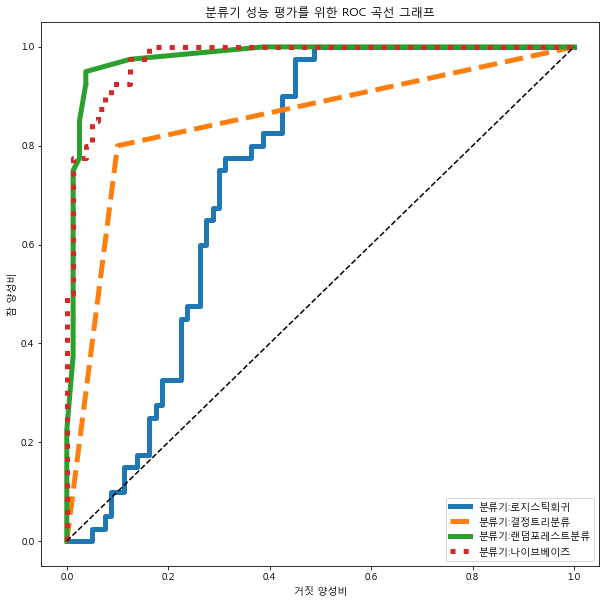

In [43]:
plt.figure( figsize=(10,10) )
# 4개 분류기 학습 및 평가 및 시각화
for mName, (lineShape, clf)  in CLASS_DICT.items():
    #print( mName, lineShape, clf )
    # 학습
    clf.fit( X_train, Y_train )
    # 예측
    # 1) 예측값으로 예측결과 : predict()
    # 2) 예측에 대한 확률로 예측 : predict_proba()
    #    => 알고리즘의 신뢰수준을 확인하는데 유용한게 활용됨
    pred = clf.predict_proba(X_test)
    # 답안 획득
    pre  = pd.Series( pred[:, 1] ) 
    # ROC 계산
    # roc_curve () 함수 호출하면 3개를 리턴 (튜플)
    # fpr : 거짓 양성비
    # tpr : 참 양성비
    # thresholds : 임계값, fpr, tpr을 계산할대 사용한 임계값
    fpr, tpr, thresholds = roc_curve( Y_test, pre )
    # 시각화 
    label = '분류기:%s' % mName
    plt.plot( fpr, tpr, lineShape, linewidth=5, label=label )

plt.legend()
plt.title('분류기 성능 평가를 위한 ROC 곡선 그래프')
# 경계 구분선
plt.plot( [0,1], [0,1], 'k--' )
# 구간 제한
#plt.xlim([ 0.0, 1.0 ])
#plt.ylim([ -0.2, 1.1 ])
# 레이블
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()

** 해석 **
- 좌측 하단 : 탐지를 못한다
- 좌측 상단 : 완벽한 분류기
- 우측 상단 : 모든값을 양성으로 분류

#### 결론 
- 품종이 versicolor 인경우 랜덤포레스분류가 가장 성능이 좋았다 
- 시각적으로 판단한것은 ROC 곡선인데 만약 곡선들이 접전을 벌인다면 해석이 힘들다
- 이런 경우 ROC 곡선을 요약하는 수치값이 필요하다. 
- ROC곡선의 하단 면적을 계산하는 방법=> AUC(area under curve)

### B-3 AUC 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


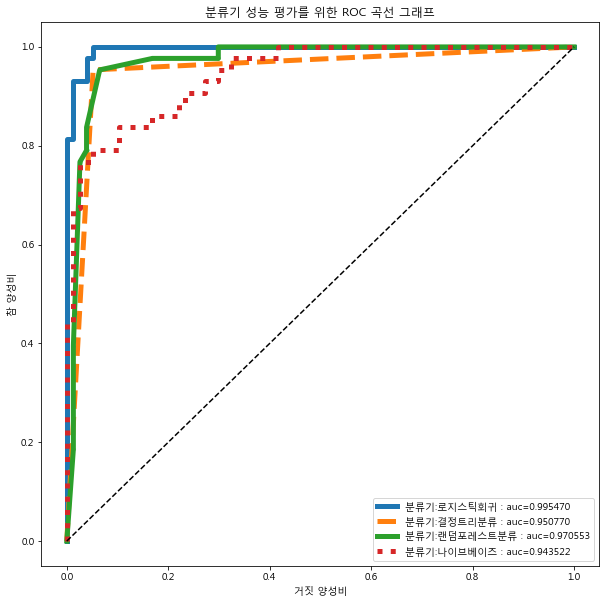

In [45]:
from sklearn.metrics import auc

# 데이터 교체
Y = df['species'] ==  ds['target_names'][2]#'virginica'
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, test_size=.8 )

plt.figure( figsize=(10,10) )
for mName, (lineShape, clf)  in CLASS_DICT.items():    
    clf.fit( X_train, Y_train )    
    pred = clf.predict_proba(X_test)    
    pre  = pd.Series( pred[:, 1] )     
    fpr, tpr, thresholds = roc_curve( Y_test, pre )    
    # auc 값 계산
    aucScore = auc( fpr, tpr )
    label = '분류기:%s : auc=%f' % (mName, aucScore)
    plt.plot( fpr, tpr, lineShape, linewidth=5, label=label )

plt.legend()
plt.title('분류기 성능 평가를 위한 ROC 곡선 그래프')
plt.plot( [0,1], [0,1], 'k--' )
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()

### 분류 기준값

- y=1-x과 만나는점  
> ROC곡선의 분류 기준값  
> 참, 거짓의 표본의 정확도가 동일해지는 지점  
 
- y=x와 평행이 되는 지점
> 변곡점  

### B-4 F1-score

- 이진 분류기는 통상 fl score로 평가함  
- 정밀도, 재현율의 조화 평균
- 정밀도 : 분류기가 양성으로 판단판 표본들 중에 실제 양성 비율
- 재현율 : 분류기가 실제로 양성으로 판단한 표본의 비율
- 조화평균 식 : 
> F1 = 1 / ( 1/정밀도 + 1/재현율 )/2 = 2*(정밀도*재현율)/(정밀도+재현율)
> 값의 범위는 0 ~1 사이 값을 가진다

[ 보충 설명 ]
- 정확도 : Accuracy
- 정밀도 : Precision
- 재현율 : Recall
- F1 Score : 정밀도와 재현율의 조화 평균

[ 해석 ]
- 정확도 : 예측이 정답과 얼마나 정확한가?
- 정밀도 : 예측한 것중에 정답의 비율은?
- 재현율 : 찾아야 할 것중에 실제로 찾은 비율은?
- F1 Score : 정밀도와 재현율의 평균
>  이중에서 F1 Score 값이 높으면 성능이 높다

### B-5 다중 클레스 분류의 평균 f1-score

- 마이크로 평균
- 매크로 평균

In [49]:
from sklearn.metrics import f1_score
y_data = [0, 1, 2, 0, 1, 2 ]
y_pre  = [0, 2, 1, 0, 0, 1 ]
[ 보충 설명 ]
# 매크로 평균
# 각 클레스에 대해 독립적으로(개별 비중에 관계없이) 평가하여 평균을 취함
print( f1_score(y_data, y_pre, average='macro') )
# 마이크로 평균
# 각 클레스에 대해 기여도(fp, fn, tp의 총수를)를 집계하여 평균을 취함
print( f1_score(y_data, y_pre, average='micro') )
# 가중치 평균
# 샘플수에 가중치를 두어서 평균을 취함 -> report에 나오는 값임
print( f1_score(y_data, y_pre, average='weighted') )
print( f1_score(y_data, y_pre, average=None) )

# 결론 
# 각 샘플을 동일하게 간주하면 => micro 사용
# 각 클레스를 동일하게 간주하면 => macro 사용
# 샘플수에 가중치를 중시하면  => weighted 사용

0.26666666666666666
0.3333333333333333
0.26666666666666666
[0.8 0.  0. ]
